## Rice Classification Using CNN | Accuracy:0.99

<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase A: Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

<a id="import"></a>
# <p style="background:#25779f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase B: Importing Datasets</p>

In [6]:
# path=os.path.join(os.getcwd(),'rice_image_datatset')
path = Path("rice_image_dataset")

In [7]:
arborio = list(path.glob('Arborio/*'))[:1000]
basmati = list(path.glob('Basmati/*'))[:1000]
ipsala = list(path.glob('Ipsala/*'))[:1000]
jasmine = list(path.glob('Jasmine/*'))[:1000]
karacadag = list(path.glob('Karacadag/*'))[:1000]

In [9]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}
rice_labels= {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3:"Jasmine",
    4:"Karacadag"}

<a id="import"></a>
# <p style="background:#2abccf url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase C: Visuallization</p>

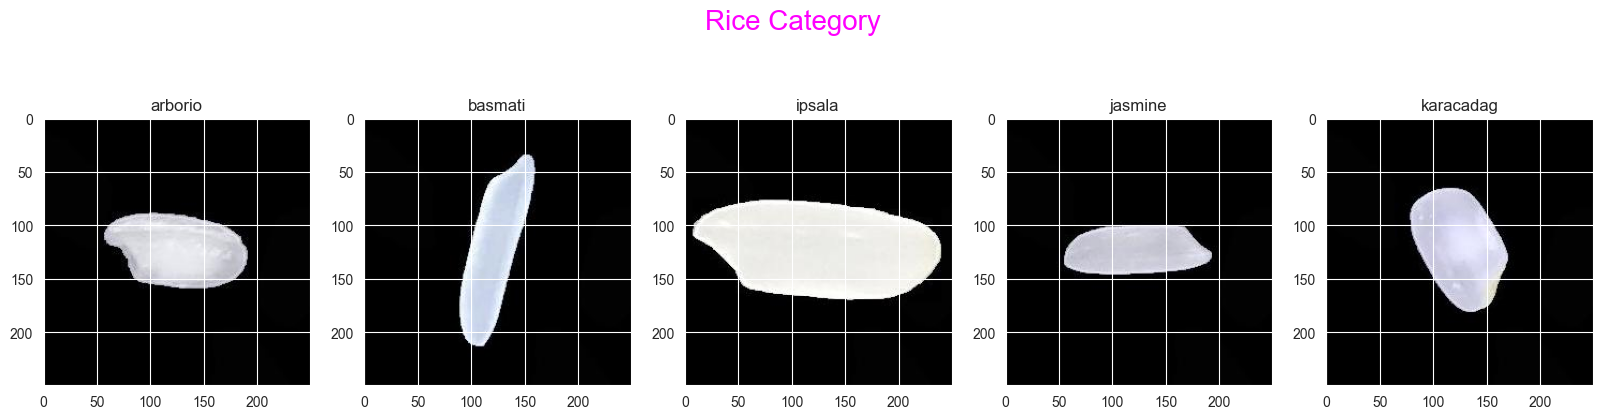

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category',color='magenta',fontsize=20)
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)


<a id="import"></a>
# <p style="background:#45b7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase D: Train & Test Definition</p>

In [16]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("rice_image_dataset",target_size=(224,224),batch_size=20,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory("rice_image_dataset",target_size=(224,224),batch_size=2,shuffle=False,subset='validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


<a id="import"></a>
# <p style="background:#ffb7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase E: Creating Simple Model</p>

In [17]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=5,activation='sigmoid'))

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_2 (Dense)             (None, 40)                15770920  
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 205       
                                                      

In [20]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optimizer,metrics=['accuracy'],loss='categorical_crossentropy')

In [21]:
cnn.fit(train_data,epochs=2,validation_data=test_data,shuffle=True)

Epoch 1/2
3000/3000 [==============================] - 1355s 452ms/step - loss: 0.1432 - accuracy: 0.9528 - val_loss: 0.0613 - val_accuracy: 0.9806
Epoch 2/2
3000/3000 [==============================] - 1394s 465ms/step - loss: 0.0520 - accuracy: 0.9823 - val_loss: 0.0383 - val_accuracy: 0.9868


In [22]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()


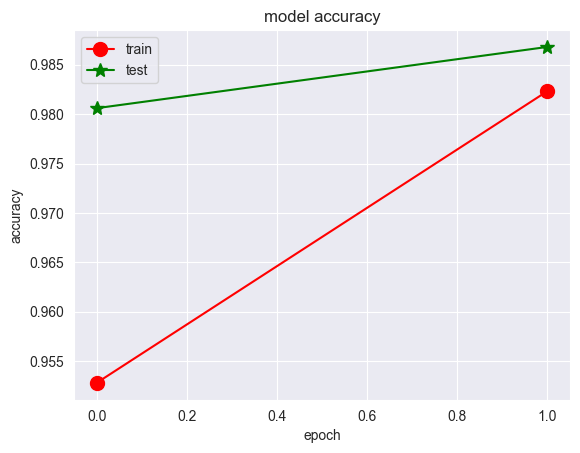

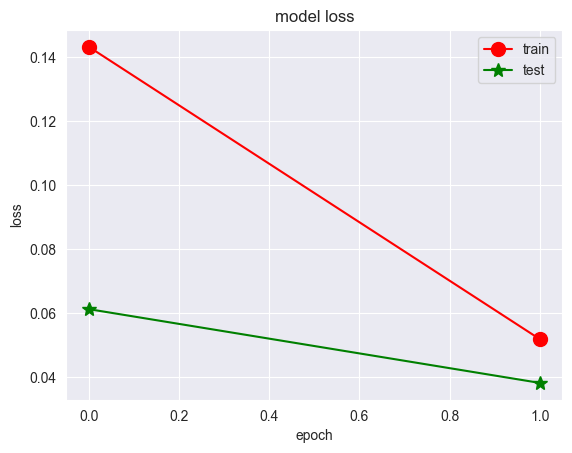

In [23]:
plot(cnn)

* __In the first epoch, **Accuracy** of **Train** is **0.955** and for **Test** is upper **0.98** . that shows us we should increase the value of **epoch**. On the other hand in the second epoch, the value of **test_Accuracy** is close to the **Train_Accurcay**
* __Beside, from the second plot we can understand this issue and finally we decide that increase the number of **Epochs**

<a id="import"></a>
# <p style="background:#ffbbaa url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase E-1: Creating Second Model </p>

* __Here, we increase the number of **epochs** to have higher scores, but we can stop the process of running the model by **keras.callbacks.EarlyStopping**

* __A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

##### You can use callbacks to:

* __Write TensorBoard logs after every batch of training to monitor your metrics
* __Periodically save your model to disk
* __Do early stopping
* __Get a view on internal states and statistics of a model during training
* __...and more


* __we use **EarlyStopping** in our model for stopping the running after 10 times. You can assign the smaller value to this hyperparameter, but we want to run more for better showing.

* __After the model training, seeing the above chart, we conclude that the best **epoch** is **six** for our model, because in this amount, train and test are very close to each other and we have received a good score for the two.

In [24]:
y_pred = cnn.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)


7500/7500 [==============================] - 88s 12ms/step


In [25]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = cnn.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [26]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      3000
     Basmati       0.97      0.98      0.98      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.98      0.97      0.97      3000
   Karacadag       1.00      0.99      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



array([[2981,    0,    3,   12,    4],
       [   0, 2950,    0,   50,    0],
       [   0,    0, 2998,    2,    0],
       [   7,   90,    1, 2902,    0],
       [  28,    0,    0,    0, 2972]], dtype=int64)

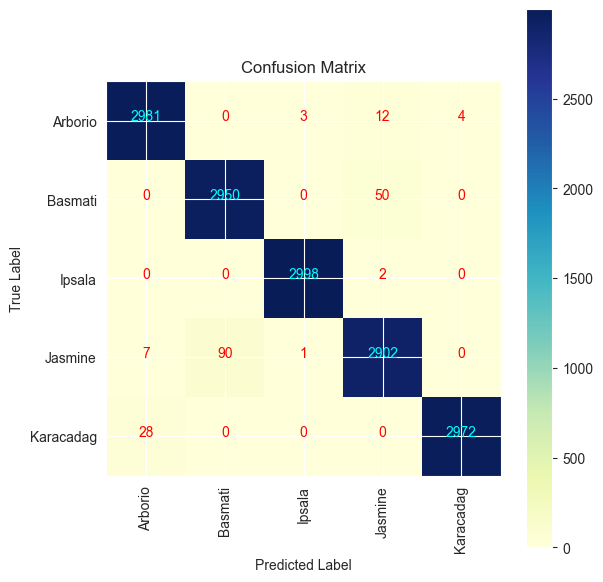

In [27]:
cm = confusion_matrix(test_data.classes, predicted_classes)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm



### Best Regards!